In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
#warnings.filterwarnings('ignore')

In [44]:
#LOADING the dataset voice.csv

voice_data = pd.read_csv("voiceDataSet.csv")
voice_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [45]:
voice_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [46]:
voice_data.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [47]:
voice_data.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [48]:
voice_data.groupby("label").count()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
label,,,,,,,,,,,,,,,,,,,,
female,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584
male,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584


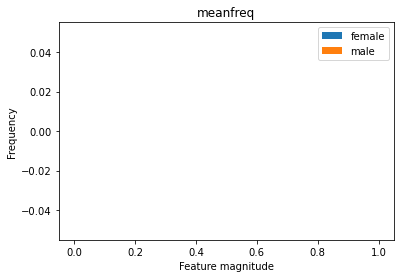

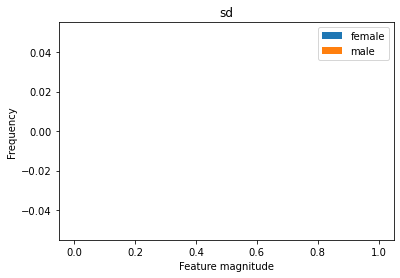

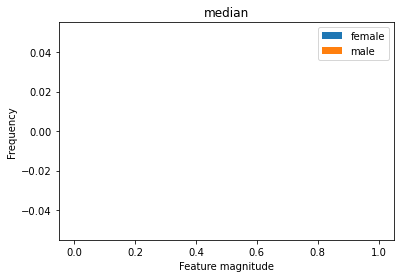

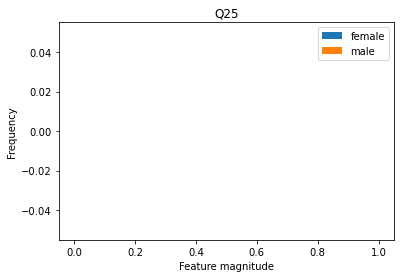

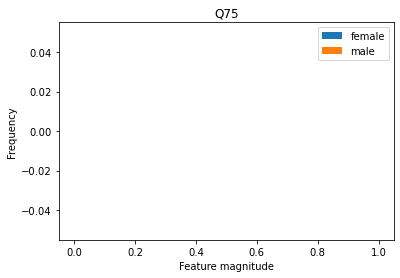

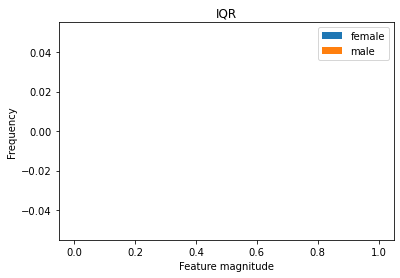

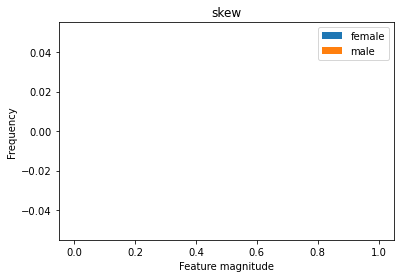

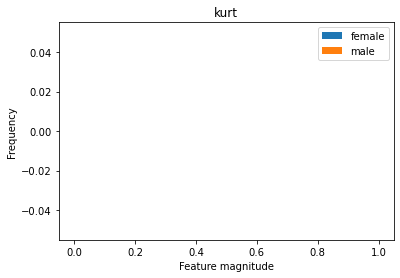

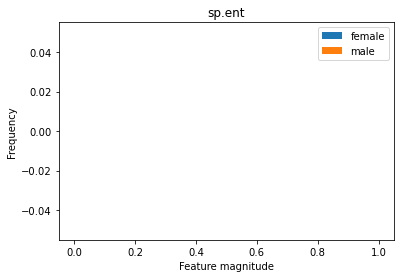

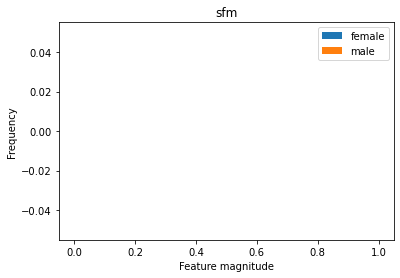

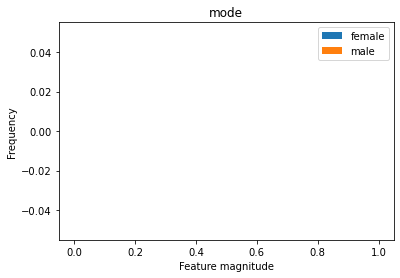

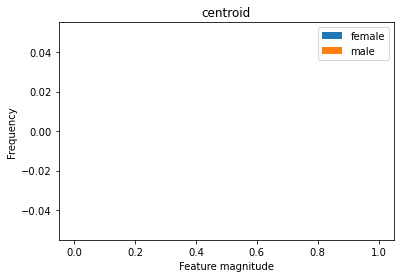

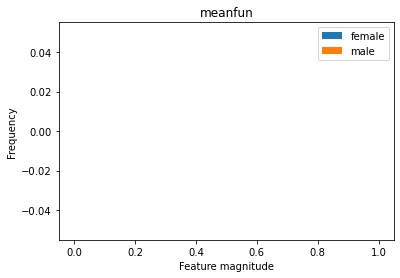

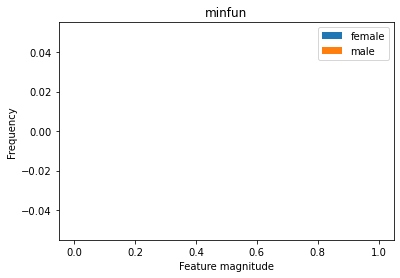

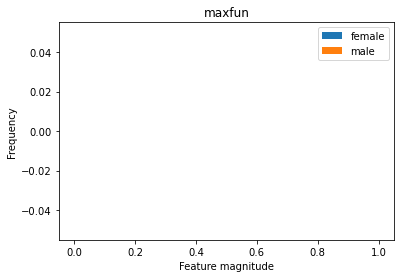

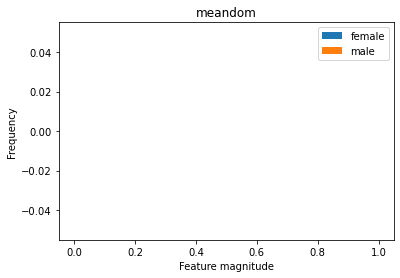

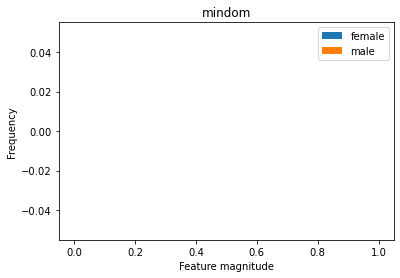

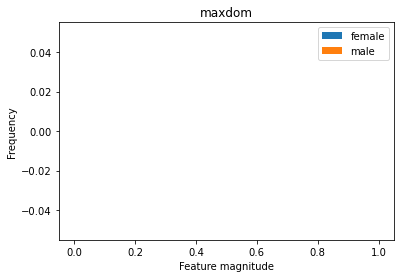

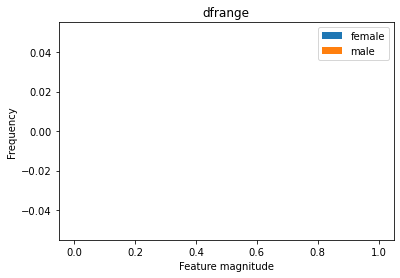

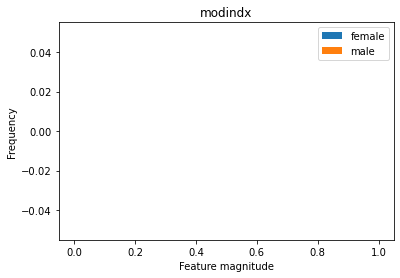

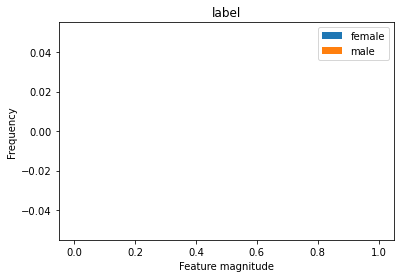

In [49]:
#Check the distribution of male and female in each feature columns




for col in voice_data.columns:
    plt.hist(voice_data.loc[voice_data['label'] == 0, col],label ="female")
    plt.hist(voice_data.loc[voice_data['label'] == 1, col],label="male")
    plt.title(col)
    plt.xlabel("Feature magnitude")
    plt.ylabel("Frequency")
    plt.legend(loc='upper right')
    plt.show()

In [50]:
print("Shape of Data:",voice_data.shape)
print("Total number of labels: {}". format(voice_data.shape[0]))
print("Number of male: {}".format(voice_data[voice_data.label == 'male'].shape[0]))
print("Number of female: {}".format(voice_data[voice_data.label == 'female'].shape[0]))

Shape of Data: (3168, 21)
Total number of labels: 3168
Number of male: 1584
Number of female: 1584


In [51]:
#Extract the target variable within X
X = voice_data.iloc[:,:-1]
print(voice_data.shape)
print(X.shape)
X

(3168, 21)
(3168, 20)


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,0.200836,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,0.013683,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,0.008006,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,0.212202,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002


The label must be converted to numerical form using LabelEncoder

In [52]:
#Encoding the label column. Female to 0 and male to 1

#class_mapping = {label: idx for idx, label in enumerate(np.unique(data['label']))}
#class_mapping
#data['label'] = data['label'].map(class_mapping)
#from sklearn.model_selection import train_test_split

#X, y = data.iloc[:, :-1].values, data.iloc[:, -1].values

#X_train, X_test, y_train, y_test =
    #train_test_split(X, y,
                     #test_size=0.3,
                     #random_state=0,
                     #stratify=y)

In [53]:
#from sklearn.preprocessing import StandardScaler

#stdsc = StandardScaler()
#X_train_std = stdsc.fit_transform(X_train)
#X_test_std = stdsc.transform(X_test)

In [54]:
from sklearn.preprocessing import LabelEncoder
#Extract the last column within y
y = voice_data.iloc[:,-1]
#initialize the label encoder
gender_encoder = LabelEncoder()
#we will encode the categorical label data so male gets encoded to 1 and female to 0.
y = gender_encoder.fit_transform(y)
y

array([1, 1, 1, ..., 0, 0, 0])

To make the model we need to scale the training data between 0 and 1

In [55]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
#fit the scaler over the training data and use transform to apply transfrormation over X
stdsc.fit(X)
X = stdsc.transform(X)

In [56]:
from sklearn.model_selection import train_test_split
#split the date between training and testing set such that the training ratio is 70:30%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.3,random_state=100)

In [57]:
#call the SVC model from Sklearn and fit the model to the data
from sklearn import metrics
#import the classification and confusion matrix
from sklearn.metrics import classification_report,confusion_matrix

In [58]:
#Train support vector machine model

svc_model = SVC()
svc_model.fit(X_train, y_train)

print("Support Vector Machine")
print("Accuracy on training set: {:.3f}".format(svc_model.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svc_model.score(X_test, y_test)))
y_pred_sm = svc_model.predict(X_test)
print(confusion_matrix(y_test,y_pred_sm))

print("Predicted value: ",y_pred_sm)
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred_sm, average='micro')
print("Precision, Recall and fscore:",precision, recall, fscore,)

Support Vector Machine
Accuracy on training set: 0.987
Accuracy on test set: 0.974
[[458  13]
 [ 12 468]]
Predicted value:  [1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0
 0 1 1 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 1 1 1 0 1 0 0 0 0 1 0 1 0 0 1 1
 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0
 0 1 0 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1 1 1
 0 0 1 1 1 1 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0
 1 1 0 1 1 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 1
 0 1 0 0 0 1 1 0 1 1 1 0 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0
 0 1 0 0 1 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 0 0 1 1 0 1 0
 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 

In [59]:
#Tuning the parameters to optimize the results
from sklearn.model_selection import GridSearchCV
#create a dictionary called param_grid and fill out some parameters for C and gamma
param_grid = {'C': [0.1,1,10,100], 'gamma':[1,0.1,0.01,0.001]}


In [60]:
#initialize the gridSearch model such that refir = true and verbose=2
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
#fit the gridSearch model on the training set
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.6s
[CV] END .....................................C=0.1, gamma=1; total time=   0.6s
[CV] END .....................................C=0.1, gamma=1; total time=   0.5s
[CV] END .....................................C=0.1, gamma=1; total time=   0.5s
[CV] END .....................................C=0.1, gamma=1; total time=   0.5s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.3s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.3s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.3s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.2s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.2s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.2s
[CV] END ..................................C=0.1

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=2)

In [61]:
#use the grid model to create predictions
grid_predict = grid.predict(X_test)

In [62]:
print('Accuracy score:')
print(metrics.accuracy_score(y_test,grid_predict))
#print("Accuracy on training set: {:.3f}".format(GridSearchCV.score(X_train, y_train)))

Accuracy score:
0.9747634069400631


In [63]:
print(classification_report(y_test,grid_predict))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       471
           1       0.97      0.97      0.97       480

    accuracy                           0.97       951
   macro avg       0.97      0.97      0.97       951
weighted avg       0.97      0.97      0.97       951



In [64]:
print(confusion_matrix(y_test,grid_predict))

[[459  12]
 [ 12 468]]


In [65]:
#Train logistic regression model

logit = LogisticRegression()
logit.fit(X_train, y_train)

print("Logistic Regression")
print("Accuracy on training set: {:.3f}".format(logit.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(logit.score(X_test, y_test)))

y_pred_logit = logit.predict(X_test)
print("Predicted value: ",y_pred_logit)

precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred_logit, average='micro')
print("Precision, Recall and fscore:",precision, recall, fscore,)

Logistic Regression
Accuracy on training set: 0.975
Accuracy on test set: 0.967
Predicted value:  [1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0
 1 0 1 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 1 1 1 0 1 0 0 0 0 1 0 1 0 0 1 1
 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0
 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1
 0 0 1 1 1 1 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 1
 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0
 1 1 0 1 1 0 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 1
 0 1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0
 0 1 0 0 1 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 0 0 1 1 0 1 0
 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 1 0 0 0 0 0 1 1 1 1 1
 0

In [66]:
#Train decision tree model


tree = DecisionTreeClassifier(random_state=0,max_depth=4)
tree.fit(X_train, y_train)

print("Decision Tree")
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

y_pred_tree = tree.predict(X_test)
print("Predicted value: ",y_pred_tree)

precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred_tree, average='micro')
print("Precision, Recall and fscore:",precision, recall, fscore,)

Decision Tree
Accuracy on training set: 0.983
Accuracy on test set: 0.964
Predicted value:  [1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0
 0 1 1 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 1 1 1 0 1 0 0 0 0 1 0 1 0 0 1 1
 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1 1 1
 0 0 1 1 1 1 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0
 1 1 1 0 1 0 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0
 1 1 0 1 1 0 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 1
 0 1 0 0 0 1 1 0 1 1 1 0 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 1 1 0 0 0 1 1 1 0 0
 0 1 0 0 1 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 0 0 1 1 0 1 0
 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 0 1 1 1 1 1
 0 1 1 1

In [67]:
#Train random forest model

forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(X_train, y_train)

print("Random Forest")
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

y_pred_forest = forest.predict(X_test)
print("Predicted value: ",y_pred_forest)

precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred_forest, average='micro')
print("Precision, Recall and fscore:",precision, recall, fscore,)

Random Forest
Accuracy on training set: 0.997
Accuracy on test set: 0.972
Predicted value:  [1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0
 0 1 1 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 1 1 1 0 1 0 0 0 0 1 0 1 0 0 1 1
 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 1
 0 1 0 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1
 0 0 1 1 1 1 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0
 1 1 1 0 1 0 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0
 1 1 0 1 1 0 0 0 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 1
 0 1 0 0 0 1 1 0 1 1 1 0 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0
 0 1 0 0 1 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 0 1 1 0 1 0
 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 0 1 1 1 1 1
 0 1 1 1

In [68]:
#Plot the graph for feature selection for decision tree and random forest
def plot_feature_importances_mydata(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,6))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), list(voice_data))
    plt.title("Feature Selection")
    plt.xlabel("Variable importance")
    plt.ylabel("Independent Variable")
    plt.show()

ValueError: The number of FixedLocator locations (20), usually from a call to set_ticks, does not match the number of ticklabels (21).

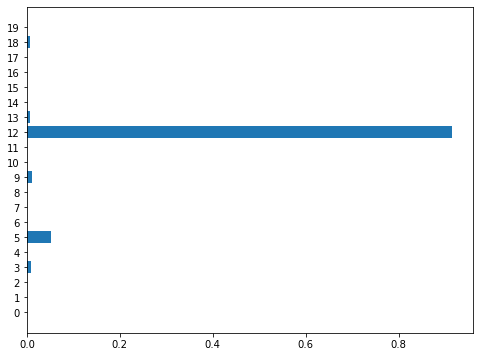

In [69]:
plot_feature_importances_mydata(tree)

In [ ]:
plot_feature_importances_mydata(forest)

In [ ]:
voice_sample = pd.read_csv("voiceSamples.csv")
voice_sample.head()


#Creating X and Y
X1, y1 = voice_sample.iloc[:, :-1].values, voice_sample.iloc[:, -1].values
y1

#standardizing the features
stdsc = StandardScaler()
X1 = stdsc.fit_transform(X1)

#Predicting the target variable using Logistic, Decision Tree , Random Forest, SVM
y1_pred_logit = logit.predict(X1)
y1_pred_tree = tree.predict(X1)
y1_pred_forest = forest.predict(X)
y1_pred_svm = svc_model.predict(X1)


print("Logistic Regression: ",y1_pred_logit)
print("TRee",y1_pred_tree)
print("Random Forest: ",y1_pred_forest)
print("SVM: ",y1_pred_svm)